In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

In [29]:
import csv
import re
import pandas as pd

import pandas
import os

import pandas as pd
from reconchess import GameHistory
import matplotlib.pyplot as plt
import numpy as np

In [39]:
from typing import List

path = "game_logs/ranked_games/batch 6 (0,5 - 0)"

games = os.listdir(path)

games = [os.path.join(path, game_id, f"game_{game_id}.log") for game_id in games]

games = [x for x in games if os.path.exists(x)]
game_hists: List[GameHistory] = [GameHistory.from_file(x) for x in games]
len(game_hists)

100

In [40]:
sum([(game.get_white_player_name() == "Zubat") == game.get_winner_color() for game in game_hists])

77

In [41]:
opponents = (
    {game.get_white_player_name() for game in game_hists}.union(
    {game.get_black_player_name() for game in game_hists}) -
    {"Zubat"}
)
opponents

{'Oracle', 'StrangeFish2', 'attacker', 'random', 'trout'}

In [42]:
grouped_games = {
    opp: [game for game in game_hists if game.get_white_player_name() == opp or game.get_black_player_name() == opp]
    for opp in opponents
}
results = {
    opp: {
        "wins": len([game for game in games if (game.get_white_player_name() == "Zubat") == game.get_winner_color()]),
        "losses": len([game for game in games if (game.get_white_player_name() == "Zubat") != game.get_winner_color()])
    }
    for opp, games in grouped_games.items()
}
results

{'StrangeFish2': {'wins': 5, 'losses': 15},
 'random': {'wins': 20, 'losses': 0},
 'trout': {'wins': 20, 'losses': 0},
 'attacker': {'wins': 20, 'losses': 0},
 'Oracle': {'wins': 12, 'losses': 8}}

In [43]:
[list(r.values())[0] for r in results.values()]

[5, 20, 20, 20, 12]

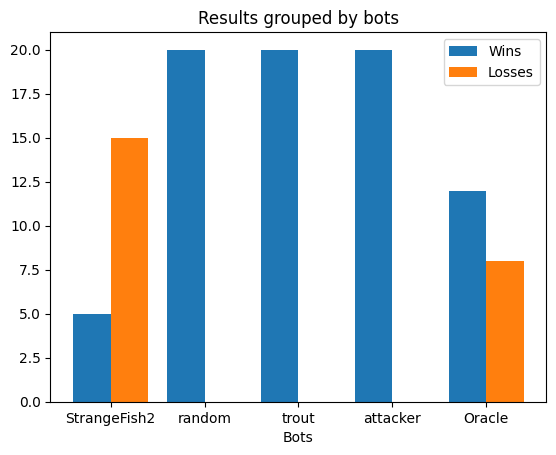

In [44]:
X = list(results.keys())
wins =  [r["wins"] for r in results.values()]
losses = [r["losses"] for r in results.values()]
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, wins, 0.4, label ='Wins') 
plt.bar(X_axis + 0.2, losses, 0.4, label ='Losses') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Bots") 
plt.title("Results grouped by bots") 
plt.legend() 
plt.show()

In [5]:
game_hists[7].get_white_player_name(), game_hists[7].get_winner_color()

('StrangeFish2', True)

In [6]:
[game.get_win_reason() for game in game_hists]

[<WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.TIMEOUT: 2>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.MOV

In [ ]:
game

### Move score analysis

In [13]:
move_score_files = [(game_id, [f for f in os.listdir(os.path.join(path, game_id)) if re.match("move_scores*", f)][0]) for game_id in os.listdir(path)]
move_score_files = [os.path.join(path, game_id, f) for (game_id, f) in move_score_files]
# move_score_files = [pd.read_csv(file) for file in move_score_files]

EmptyDataError: No columns to parse from file

In [26]:
for file in move_score_files[2:3]:
    try:
        data = pd.read_csv(file)
        for i in range(len(data)):
            if data["move_number"][i] == data["move_number"][i+1] and data["analytical"][i] < data["analytical"][i+1] + 200:
                print(data["move_number"][i])
    except:
        continue


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14


In [20]:
data["gamble"][0]

418.0307647058824

In [27]:
file

'game_logs/remote_test_games/batch_4\\1691451636\\move_scores_zubat_1691451636_b.csv'

### Replay game

In [1]:
from game_log_reader.playback import playback
from strangefish.zubat_strategy.zubat_strategy import Zubat
from strangefish.models.uncertainty_lstm import uncertainty_lstm_1

In [2]:
game_id = 1694477815
game_path = f"game_logs/remote_test_games/batch_4/{game_id}/game_{game_id}.log"
game_hist = GameHistory.from_file(game_path)
color = False

NameError: name 'GameHistory' is not defined

In [5]:
zubat = Zubat(uncertainty_model=uncertainty_lstm_1('uncertainty_model/uncertainty_lstm_3/weights'), game_id=game_id)

In [ ]:
playback(game_hist, zubat, color)